In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.DataFrame()
filenames = glob("DataGovSG/*_rainfall.csv")
for filename in filenames:
    other_df = pd.read_csv(filename)
    other_df = other_df.rename(columns={"value": "rainfall"})
    other_df["timestamp_sgt"] = other_df["timestamp_sgt"].astype("datetime64[ns]")
    df = df.append(other_df,ignore_index=True)
another_df = df.set_index("station_id").sort_index()

In [3]:
locations = pd.read_csv("StationLocations.csv")
locations=locations.rename(columns={"Lon (d)":"longitude","Lat (d)":"latitude"})
#locations

In [4]:
nnon_zero = another_df[another_df["rainfall"]>0]
nnon_zero = nnon_zero.sort_values("timestamp_sgt",ascending=True).reset_index().set_index("timestamp_sgt",drop=False)
times = nnon_zero.index
nnon_zero = nnon_zero.set_index([times.year,times.month,times.day,times.hour])
nnon_zero.index.names = ["year","month","day","hour"]
#non_zero
number = nnon_zero.groupby(["year","month","day","hour"])["station_id"].nunique()
number=number[number==1]
one_station = list(number.index)
nnon_zero=nnon_zero.drop(one_station)
#nnon_zero

In [16]:
nnon_zero = nnon_zero.groupby(["year","month","day","hour","station_id"]).sum()
nnon_zero.reset_index(inplace=True)
nnon_zero.set_index(["year","month","day","hour"],inplace=True)
nnon_zero

station_id  rainfall
year month day hour                     
2016 12    3   1           S06       0.8
               1           S07       2.2
               1          S102       0.4
               1          S110       2.2
               1          S113       1.0
               1          S118       1.8
               1          S119       0.8
               1          S123       0.4
               1           S29       0.2
               1           S36       1.2
               1           S43       2.0
               1           S55       1.6
               1           S61       1.4
               1           S71       0.2
               1           S78       3.2
               1           S79       0.4
               1           S81       1.2
               1           S84       0.4
               1           S88       1.4
               1           S90       0.2
               1           S94       0.8
               1           S96       2.2
               2          S106       0.8
               2          S117       0.2
               2           S29       1.0
               2           S77       0.2
               2           S94       1.2
               2           S96       0.2
               4          S102       0.8
               4          S106       0.2
...                        ...       ...
2017 4     29  6           S92       1.2
               7          S116       0.2
               7          S117       0.2
               7          S119       0.6
               7          S123       0.2
               7           S33       1.0
               7           S35       0.6
               7           S43       0.2
               7           S63       0.2
               7           S71       0.2
               7           S77       1.0
               7           S79       1.0
               7           S88       0.2
               9          S115       3.2
               9          S117       0.4
               9           S92       0.2
               10         S115       1.4
               10         S116       3.0
               10         S117       0.2
               10          S63       0.2
               10          S92       0.4
               12         S108       0.2
               12          S92       0.2
               17          S55       0.8
               17          S81       6.4
               17         S900       0.2
           30  19         S100      24.0
               19         S104       4.0
               19         S112      34.8
               19          S66      27.8

[16612 rows x 2 columns]

In [17]:
indices = nnon_zero.index.unique().values

In [7]:
new = nnon_zero.reset_index()
inner_df = pd.merge(new, locations,how="left",on="station_id")
inner_df

,year,month,day,hour,station_id,rainfall,longitude,latitude
0,2016,12,3,1,S06,0.8,103.90070,1.35240
1,2016,12,3,1,S07,2.2,103.83340,1.34150
2,2016,12,3,1,S102,0.4,103.76800,1.18900
3,2016,12,3,1,S110,2.2,103.86970,1.36061
4,2016,12,3,1,S113,1.0,103.91074,1.30655
5,2016,12,3,1,S118,1.8,103.84610,1.29940
6,2016,12,3,1,S119,0.8,103.86660,1.30105
7,2016,12,3,1,S123,0.4,103.85770,1.32140
8,2016,12,3,1,S29,0.2,103.93500,1.38700
9,2016,12,3,1,S36,1.2,103.86570,1.33820


In [8]:
inner_df = inner_df.set_index(["year","month","day","hour","station_id"])
inner_df

rainfall  longitude  latitude
year month day hour station_id                               
2016 12    3   1    S06              0.8  103.90070   1.35240
                    S07              2.2  103.83340   1.34150
                    S102             0.4  103.76800   1.18900
                    S110             2.2  103.86970   1.36061
                    S113             1.0  103.91074   1.30655
                    S118             1.8  103.84610   1.29940
                    S119             0.8  103.86660   1.30105
                    S123             0.4  103.85770   1.32140
                    S29              0.2  103.93500   1.38700
                    S36              1.2  103.86570   1.33820
                    S43              2.0  103.88780   1.33990
                    S55              1.6  103.88600   1.38370
                    S61              1.4  103.92170   1.32300
                    S71              0.2  103.78150   1.29230
                    S78              3.2  103.89067   1.30703
                    S79              0.4  103.83720   1.30040
                    S81              1.2  103.90920   1.40290
                    S84              0.4  103.94440   1.34370
                    S88              1.4  103.84820   1.34270
                    S90              0.2  103.81910   1.31910
                    S94              0.8  103.95280   1.36620
                    S96              2.2  104.03070   1.31750
               2    S106             0.8  103.96730   1.41680
                    S117             0.2  103.67900   1.25600
                    S29              1.0  103.93500   1.38700
                    S77              0.2  103.81250   1.29370
                    S94              1.2  103.95280   1.36620
                    S96              0.2  104.03070   1.31750
               4    S102             0.8  103.76800   1.18900
                    S106             0.2  103.96730   1.41680
...                                  ...        ...       ...
2017 4     29  6    S92              1.2  103.78860   1.28410
               7    S116             0.2  103.75400   1.28100
                    S117             0.2  103.67900   1.25600
                    S119             0.6  103.86660   1.30105
                    S123             0.2  103.85770   1.32140
                    S33              1.0  103.71000   1.30810
                    S35              0.6  103.75560   1.33290
                    S43              0.2  103.88780   1.33990
                    S63              0.2  103.70420   1.32750
                    S71              0.2  103.78150   1.29230
                    S77              1.0  103.81250   1.29370
                    S79              1.0  103.83720   1.30040
                    S88              0.2  103.84820   1.34270
               9    S115             3.2  103.61843   1.29377
                    S117             0.4  103.67900   1.25600
                    S92              0.2  103.78860   1.28410
               10   S115             1.4  103.61843   1.29377
                    S116             3.0  103.75400   1.28100
                    S117             0.2  103.67900   1.25600
                    S63              0.2  103.70420   1.32750
                    S92              0.4  103.78860   1.28410
               12   S108             0.2  103.87030   1.27990
                    S92              0.2  103.78860   1.28410
               17   S55              0.8  103.88600   1.38370
                    S81              6.4  103.90920   1.40290
                    S900             0.2  103.86922   1.41284
           30  19   S100            24.0  103.74855   1.41720
                    S104             4.0  103.78538   1.44387
                    S112            34.8  103.70131   1.43854
                    S66             27.8  103.73630   1.43870

[16612 rows x 3 columns]

In [9]:
try_df = inner_df.unstack("station_id")
try_df

rainfall                                                 \
station_id               S06   S07   S08  S100  S101  S102 S104  S106  S107   
year month day hour                                                           
2016 12    3   1         0.8   2.2   NaN   NaN   NaN   0.4  NaN   NaN   NaN   
               2         NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.8   NaN   
               4         NaN   NaN   NaN   NaN   NaN   0.8  NaN   0.2   NaN   
               5         3.0   4.4   1.4   NaN   NaN   3.4  NaN   0.2   NaN   
               6         4.2   0.8   1.0   NaN   0.2   0.2  NaN   0.4   NaN   
               7         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           4   3         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               21        NaN   4.2   0.6   NaN   NaN   NaN  NaN   NaN   NaN   
               22        1.0   0.6   0.8   NaN   NaN   NaN  NaN   NaN   5.8   
               23        NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.2   NaN   
           5   5         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               6         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               21        NaN   NaN   NaN   NaN   1.6   4.8  NaN   NaN   NaN   
               22        3.0   3.8  10.8  14.0  15.4   4.4  8.2   2.2   0.8   
               23        1.4   1.8   1.6   1.6   1.6   0.4  2.0   0.6   0.6   
           6   0         0.2   0.4   0.4   0.2   0.2   0.2  NaN   0.2   0.2   
               1         0.2   0.2   NaN   NaN   NaN   NaN  0.2   0.4   NaN   
               2         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               3         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               4         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               6         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               9         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   0.2   
               14        1.8   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.4   NaN   
               17       21.0   NaN   NaN   NaN   NaN   NaN  NaN  11.8   4.4   
               18        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           7   9         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   NaN   NaN   NaN   NaN  NaN  11.0   NaN   
               17        NaN   NaN   NaN   NaN   NaN   NaN  1.4   9.0  10.8   
               18        0.2   NaN   NaN   NaN   NaN   NaN  NaN   3.6   0.2   
...                      ...   ...   ...   ...   ...   ...  ...   ...   ...   
2017 4     25  15        NaN   NaN   0.2   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   0.2   NaN   NaN   NaN  NaN   0.2   NaN   
               17        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               18        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           26  10        NaN   NaN   NaN   NaN   NaN   2.2  NaN   NaN   8.6   
               11        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           27  15        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   0.8   NaN   NaN   NaN  NaN   NaN   NaN   
               17        NaN  10.6   3.6   NaN   0.2   NaN  NaN   NaN   NaN   
               18        NaN   NaN   NaN   NaN   0.2   NaN  NaN   NaN   NaN   
               22        NaN   NaN   NaN   NaN   0.2   NaN  NaN   NaN   NaN   
               23        NaN   NaN   NaN   NaN  13.6  16.0  NaN   NaN   NaN   
           28  0         NaN   5.2  14.4   NaN   1.0   1.2  1.4   NaN  14.8   
               1         NaN   2.6   1.8   3.2   0.2   NaN  0.8   0.4   6.4   
               2         NaN   0.6   NaN   0.6   1.0   0.2  0.2   4.2   NaN   
               3         NaN   0.4   0.6   0.2   0.4   NaN  0.6   0.2   NaN   
               4         NaN   NaN   NaN   0.4   NaN   NaN  0.2   NaN 

In [40]:
correlatio = try_df.loc[(2016,12,3,1),"rainfall"].corr()
correlatio=correlatio.loc["rainfall"]
correlatio

TypeError: corr() missing 1 required positional argument: 'other'

In [38]:
try_df.loc[(2016,12,3,1),("latitude","S81")]

1.4029

In [33]:
trying = locations.set_index("station_id",drop=True)
trying["longitude"] = trying["longitude"]-trying.loc["S06","longitude"]
trying["latitude"] = trying["latitude"]-trying.loc["S06","latitude"]
trying

,longitude,latitude
station_id,,
S06,0.00000,0.00000
S07,-0.06730,-0.01090
S08,-0.07360,0.01770
S11,-0.20690,0.02220
S23,-0.18930,0.03340
S24,0.08190,0.01540
S25,-0.03530,0.06420
S29,0.03430,0.03460
S31,-0.07270,-0.07790


ValueError: Must pass 2-d input

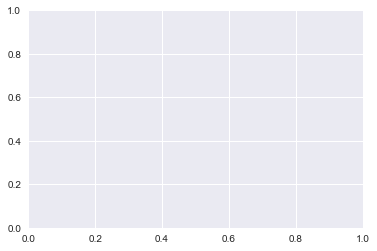

In [36]:
for station in nnon_zero["station_id"]:
    ax=plt.axes()
    sns.heatmap(correlatio.loc[station,"S06"], x=trying.loc[station,"latitude"],y=trying.loc[station,"longitude"],ax=ax)
    plt.show()

In [23]:
nnon_zero

station_id  rainfall
year month day hour                     
2016 12    3   1           S06       0.8
               1           S07       2.2
               1          S102       0.4
               1          S110       2.2
               1          S113       1.0
               1          S118       1.8
               1          S119       0.8
               1          S123       0.4
               1           S29       0.2
               1           S36       1.2
               1           S43       2.0
               1           S55       1.6
               1           S61       1.4
               1           S71       0.2
               1           S78       3.2
               1           S79       0.4
               1           S81       1.2
               1           S84       0.4
               1           S88       1.4
               1           S90       0.2
               1           S94       0.8
               1           S96       2.2
               2          S106       0.8
               2          S117       0.2
               2           S29       1.0
               2           S77       0.2
               2           S94       1.2
               2           S96       0.2
               4          S102       0.8
               4          S106       0.2
...                        ...       ...
2017 4     29  6           S92       1.2
               7          S116       0.2
               7          S117       0.2
               7          S119       0.6
               7          S123       0.2
               7           S33       1.0
               7           S35       0.6
               7           S43       0.2
               7           S63       0.2
               7           S71       0.2
               7           S77       1.0
               7           S79       1.0
               7           S88       0.2
               9          S115       3.2
               9          S117       0.4
               9           S92       0.2
               10         S115       1.4
               10         S116       3.0
               10         S117       0.2
               10          S63       0.2
               10          S92       0.4
               12         S108       0.2
               12          S92       0.2
               17          S55       0.8
               17          S81       6.4
               17         S900       0.2
           30  19         S100      24.0
               19         S104       4.0
               19         S112      34.8
               19          S66      27.8

[16612 rows x 2 columns]

In [7]:
non_zero = nnon_zero.set_index("station_id",append=True)

In [8]:
non_zero = nnon_zero.unstack("station_id")
non_zero

rainfall                                                 \
station_id               S06   S07   S08  S100  S101  S102 S104  S106  S107   
year month day hour                                                           
2016 12    3   1         0.8   2.2   NaN   NaN   NaN   0.4  NaN   NaN   NaN   
               2         NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.8   NaN   
               4         NaN   NaN   NaN   NaN   NaN   0.8  NaN   0.2   NaN   
               5         3.0   4.4   1.4   NaN   NaN   3.4  NaN   0.2   NaN   
               6         4.2   0.8   1.0   NaN   0.2   0.2  NaN   0.4   NaN   
               7         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           4   3         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               21        NaN   4.2   0.6   NaN   NaN   NaN  NaN   NaN   NaN   
               22        1.0   0.6   0.8   NaN   NaN   NaN  NaN   NaN   5.8   
               23        NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.2   NaN   
           5   5         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               6         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               21        NaN   NaN   NaN   NaN   1.6   4.8  NaN   NaN   NaN   
               22        3.0   3.8  10.8  14.0  15.4   4.4  8.2   2.2   0.8   
               23        1.4   1.8   1.6   1.6   1.6   0.4  2.0   0.6   0.6   
           6   0         0.2   0.4   0.4   0.2   0.2   0.2  NaN   0.2   0.2   
               1         0.2   0.2   NaN   NaN   NaN   NaN  0.2   0.4   NaN   
               2         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               3         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               4         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               6         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               9         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   0.2   
               14        1.8   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.4   NaN   
               17       21.0   NaN   NaN   NaN   NaN   NaN  NaN  11.8   4.4   
               18        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           7   9         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   NaN   NaN   NaN   NaN  NaN  11.0   NaN   
               17        NaN   NaN   NaN   NaN   NaN   NaN  1.4   9.0  10.8   
               18        0.2   NaN   NaN   NaN   NaN   NaN  NaN   3.6   0.2   
...                      ...   ...   ...   ...   ...   ...  ...   ...   ...   
2017 4     25  15        NaN   NaN   0.2   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   0.2   NaN   NaN   NaN  NaN   0.2   NaN   
               17        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               18        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           26  10        NaN   NaN   NaN   NaN   NaN   2.2  NaN   NaN   8.6   
               11        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           27  15        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   0.8   NaN   NaN   NaN  NaN   NaN   NaN   
               17        NaN  10.6   3.6   NaN   0.2   NaN  NaN   NaN   NaN   
               18        NaN   NaN   NaN   NaN   0.2   NaN  NaN   NaN   NaN   
               22        NaN   NaN   NaN   NaN   0.2   NaN  NaN   NaN   NaN   
               23        NaN   NaN   NaN   NaN  13.6  16.0  NaN   NaN   NaN   
           28  0         NaN   5.2  14.4   NaN   1.0   1.2  1.4   NaN  14.8   
               1         NaN   2.6   1.8   3.2   0.2   NaN  0.8   0.4   6.4   
               2         NaN   0.6   NaN   0.6   1.0   0.2  0.2   4.2   NaN   
               3         NaN   0.4   0.6   0.2   0.4   NaN  0.6   0.2   NaN   
               4         NaN   NaN   NaN   0.4   NaN   NaN  0.2   NaN 

In [9]:
correlations = non_zero.corr()
correlations

rainfall                                          \
station_id                S06       S07       S08      S100      S101   
         station_id                                                     
rainfall S06         1.000000  0.593226  0.487421  0.112497  0.130637   
         S07         0.593226  1.000000  0.718999  0.395430  0.097935   
         S08         0.487421  0.718999  1.000000  0.515422  0.263732   
         S100        0.112497  0.395430  0.515422  1.000000  0.428489   
         S101        0.130637  0.097935  0.263732  0.428489  1.000000   
         S102        0.273971  0.142535  0.025939  0.083627  0.305881   
         S104        0.223342  0.180479  0.277399  0.456643  0.305669   
         S106        0.347854  0.328203  0.304070  0.243877  0.317568   
         S107        0.459913  0.407127  0.351274  0.131319  0.219875   
         S108        0.432959  0.559687  0.408480  0.212952  0.299285   
         S109        0.623784  0.463805  0.690467  0.281877  0.307584   
         S11         0.238281  0.099948  0.136452  0.231105  0.627217   
         S110        0.796136  0.570764  0.464048  0.293542  0.221409   
         S112        0.211852  0.260937  0.303765  0.672629  0.166853   
         S113        0.456956  0.512311  0.361128  0.106176  0.149669   
         S114        0.204343  0.346477  0.281753  0.627705  0.583985   
         S115        0.215209  0.233405  0.103819  0.237542  0.232327   
         S116        0.199577  0.281668  0.273192  0.235399  0.371602   
         S117        0.160305  0.305162  0.034523  0.150636  0.209939   
         S118        0.277671  0.489159  0.238589  0.225071  0.284244   
         S119        0.313949  0.505790  0.284465  0.230389  0.354298   
         S120        0.359699  0.601461  0.489965  0.314273  0.292751   
         S121        0.289482  0.292010  0.222842  0.371205  0.701383   
         S122        0.600709  0.388226  0.587482  0.465114  0.272065   
         S123        0.657284  0.706982  0.452692  0.272856  0.205312   
         S24         0.426839  0.380971  0.269312  0.159742  0.335079   
         S29         0.499252  0.159244  0.230470  0.126787  0.280175   
         S33         0.322013  0.218655  0.210567  0.285587  0.396877   
         S35         0.073392  0.260881  0.386955  0.417677  0.480622   
         S36         0.583066  0.898506  0.664696  0.441555  0.212020   
         S40         0.336840  0.501013  0.570183  0.626446  0.249223   
         S43         0.718791  0.789237  0.485080  0.289305  0.102795   
         S44         0.588295  0.543961  0.369503  0.105715  0.484598   
         S46         0.449546  0.786351  0.641499  0.305173  0.361249   
         S50         0.295336  0.415777  0.500792  0.381056  0.480353   
         S55         0.737339  0.383653  0.390706  0.120047  0.209177   
         S60         0.063137  0.149245  0.049206 -0.029717  0.062502   
         S61         0.621812  0.554769  0.391846  0.140898  0.176014   
         S63         0.417486  0.311301  0.322700  0.352050  0.569686   
         S64         0.248150  0.492055  0.455123  0.709862  0.330254   
         S66         0.170232  0.243761  0.317475  0.791111  0.336955   
         S69         0.402341  0.705496  0.739474  0.440524  0.335694   
         S71         0.235710  0.325242  0.278902  0.210904  0.409295   
         S77         0.329417  0.437054  0.327269  0.254971  0.396790   
         S78         0.521405  0.659407  0.457867  0.205404  0.239267   
         S79         0.346278  0.519482  0.281862  0.285603  0.273755   
         S81         0.600710  0.290244  0.216722  0.079777  0.298074   
         S84         0.534883  0.149056  0.201384  0.208006  0.066134   
         S88         0.586128  0.906465  0.686947  0.495838  0.123183   
         S89         0.328974  0.281168  0.256499  0.067235  0.289447   
         S90         0.467379  0.706577  0.571478  0.277690  0.168941   
         S900        0.626456  0.385601  0.514385  0.088597  0.064628   
      

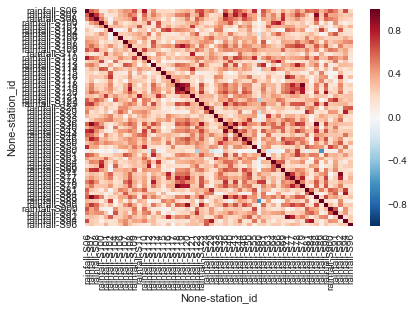

In [122]:
ax=plt.axes()
sns.heatmap(correlations,ax=ax)
#ax.set_title("Average Total Hourly Rainfall")
plt.show()

In [10]:
correlations.reset_index(inplace=True)
del correlations["level_0"]
correlations.set_index("station_id", inplace=True)
correlations.columns = correlations.columns.droplevel()
correlations

station_id,S06,S07,S08,S100,S101,S102,S104,S106,S107,S108,...,S81,S84,S88,S89,S90,S900,S91,S92,S94,S96
station_id,,,,,,,,,,,,,,,,,,,,,
S06,1.000000,0.593226,0.487421,0.112497,0.130637,0.273971,0.223342,0.347854,0.459913,0.432959,...,0.600710,0.534883,0.586128,0.328974,0.467379,0.626456,0.507670,0.267013,0.649989,0.216955
S07,0.593226,1.000000,0.718999,0.395430,0.097935,0.142535,0.180479,0.328203,0.407127,0.559687,...,0.290244,0.149056,0.906465,0.281168,0.706577,0.385601,0.393087,0.304304,0.253435,0.274067
S08,0.487421,0.718999,1.000000,0.515422,0.263732,0.025939,0.277399,0.304070,0.351274,0.408480,...,0.216722,0.201384,0.686947,0.256499,0.571478,0.514385,0.450226,0.262198,0.234132,0.210620
S100,0.112497,0.395430,0.515422,1.000000,0.428489,0.083627,0.456643,0.243877,0.131319,0.212952,...,0.079777,0.208006,0.495838,0.067235,0.277690,0.088597,0.454139,0.161006,0.061966,0.143029
S101,0.130637,0.097935,0.263732,0.428489,1.000000,0.305881,0.305669,0.317568,0.219875,0.299285,...,0.298074,0.066134,0.123183,0.289447,0.168941,0.064628,0.255714,0.345807,0.213705,0.346840
S102,0.273971,0.142535,0.025939,0.083627,0.305881,1.000000,0.042284,-0.025504,0.125982,0.454622,...,0.024697,0.099281,0.234912,0.680480,0.320492,0.012614,0.006669,0.606287,0.149070,0.141777
S104,0.223342,0.180479,0.277399,0.456643,0.305669,0.042284,1.000000,0.270345,0.246076,0.285108,...,0.256316,0.323320,0.206007,0.020924,0.071720,0.453249,0.632229,0.237067,0.178614,0.161011
S106,0.347854,0.328203,0.304070,0.243877,0.317568,-0.025504,0.270345,1.000000,0.200039,0.145948,...,0.497984,0.254986,0.383362,0.305199,0.232819,0.236296,0.238373,0.256481,0.379497,0.272266
S107,0.459913,0.407127,0.351274,0.131319,0.219875,0.125982,0.246076,0.200039,1.000000,0.425252,...,0.442685,0.607675,0.374849,0.110711,0.446705,0.258754,0.340900,0.368645,0.463616,0.485232


In [190]:
correlations["S06"]

station_id
S06     1.000000
S07     0.593226
S08     0.487421
S100    0.112497
S101    0.130637
S102    0.273971
S104    0.223342
S106    0.347854
S107    0.459913
S108    0.432959
S109    0.623784
S11     0.238281
S110    0.796136
S112    0.211852
S113    0.456956
S114    0.204343
S115    0.215209
S116    0.199577
S117    0.160305
S118    0.277671
S119    0.313949
S120    0.359699
S121    0.289482
S122    0.600709
S123    0.657284
S24     0.426839
S29     0.499252
S33     0.322013
S35     0.073392
S36     0.583066
S40     0.336840
S43     0.718791
S44     0.588295
S46     0.449546
S50     0.295336
S55     0.737339
S60     0.063137
S61     0.621812
S63     0.417486
S64     0.248150
S66     0.170232
S69     0.402341
S71     0.235710
S77     0.329417
S78     0.521405
S79     0.346278
S81     0.600710
S84     0.534883
S88     0.586128
S89     0.328974
S90     0.467379
S900    0.626456
S91     0.507670
S92     0.267013
S94     0.649989
S96     0.216955
Name: S06, dtype: float64

In [206]:
hmmm = correlations.reset_index()
#correlations.drop(["index","level_0"])
#print(correlations)
for station in hmmm["station_id"].unique():
    idx = locations["station_id"].values.tolist().index(station)
    lat = locations.loc[idx,"latitude"]
    locations["latitude"]=locations["latitude"]-lat
    long = locations.loc[idx,"longitude"]
    locations["longitude"]=locations["longitude"]-long
    new_df = locations.set_index("station_id")
    new_df = new_df.append(correlations[station])
    print(new_df)
    del new_df[station]
    #print(locations)
    #ax=plt.axes()
    #sns.heatmap(correlations.set_index("station_id")[station],x=locations["longitude"],y=locations["latitude"],ax=ax)
    #plt.show()
    #plt.pcolor(correlations)
    #plt.yticks(np.arange(0.5, len(locations.latitude), 1), locations.latitude)
    #plt.xticks(np.arange(0.5, len(locations.longitude), 1), locations.longitude)
    #plt.show()
    #print(correlations.loc["rainfall",station])

            longitude  latitude  S06       S07       S08      S100      S101  \
station_id                                                                     
S06           0.00000   0.00000  NaN       NaN       NaN       NaN       NaN   
S07          -0.06730  -0.01090  NaN       NaN       NaN       NaN       NaN   
S08          -0.07360   0.01770  NaN       NaN       NaN       NaN       NaN   
S11          -0.20690   0.02220  NaN       NaN       NaN       NaN       NaN   
S23          -0.18930   0.03340  NaN       NaN       NaN       NaN       NaN   
S24           0.08190   0.01540  NaN       NaN       NaN       NaN       NaN   
S25          -0.03530   0.06420  NaN       NaN       NaN       NaN       NaN   
S29           0.03430   0.03460  NaN       NaN       NaN       NaN       NaN   
S31          -0.07270  -0.07790  NaN       NaN       NaN       NaN       NaN   
S33          -0.19070  -0.04430  NaN       NaN       NaN       NaN       NaN   
S35          -0.14510  -0.01950  NaN    

            longitude  latitude       S06      S07       S08  S100      S101  \
station_id                                                                     
S06           0.15215  -0.06480       NaN      NaN       NaN   NaN       NaN   
S07           0.08485  -0.07570       NaN      NaN       NaN   NaN       NaN   
S08           0.07855  -0.04710       NaN      NaN       NaN   NaN       NaN   
S11          -0.05475  -0.04260       NaN      NaN       NaN   NaN       NaN   
S23          -0.03715  -0.03140       NaN      NaN       NaN   NaN       NaN   
S24           0.23405  -0.04940       NaN      NaN       NaN   NaN       NaN   
S25           0.11685  -0.00060       NaN      NaN       NaN   NaN       NaN   
S29           0.18645  -0.03020       NaN      NaN       NaN   NaN       NaN   
S31           0.07945  -0.14270       NaN      NaN       NaN   NaN       NaN   
S33          -0.03855  -0.10910       NaN      NaN       NaN   NaN       NaN   
S35           0.00705  -0.08430       Na

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.13270   0.16340       NaN       NaN       NaN       NaN   
S07           0.06540   0.15250       NaN       NaN       NaN       NaN   
S08           0.05910   0.18110       NaN       NaN       NaN       NaN   
S11          -0.07420   0.18560       NaN       NaN       NaN       NaN   
S23          -0.05660   0.19680       NaN       NaN       NaN       NaN   
S24           0.21460   0.17880       NaN       NaN       NaN       NaN   
S25           0.09740   0.22760       NaN       NaN       NaN       NaN   
S29           0.16700   0.19800       NaN       NaN       NaN       NaN   
S31           0.06000   0.08550       NaN       NaN       NaN       NaN   
S33          -0.05800   0.11910       NaN       NaN       NaN       NaN   
S35          -0.01240   0.14390       NaN       NaN       NaN       NaN   
S36           0.09770   0

            longitude  latitude       S06       S07      S08      S100  \
station_id                                                               
S06          -0.06660  -0.06440       NaN       NaN      NaN       NaN   
S07          -0.13390  -0.07530       NaN       NaN      NaN       NaN   
S08          -0.14020  -0.04670       NaN       NaN      NaN       NaN   
S11          -0.27350  -0.04220       NaN       NaN      NaN       NaN   
S23          -0.25590  -0.03100       NaN       NaN      NaN       NaN   
S24           0.01530  -0.04900       NaN       NaN      NaN       NaN   
S25          -0.10190  -0.00020       NaN       NaN      NaN       NaN   
S29          -0.03230  -0.02980       NaN       NaN      NaN       NaN   
S31          -0.13930  -0.14230       NaN       NaN      NaN       NaN   
S33          -0.25730  -0.10870       NaN       NaN      NaN       NaN   
S35          -0.21170  -0.08390       NaN       NaN      NaN       NaN   
S36          -0.10160  -0.07860       

            longitude  latitude       S06       S07      S08      S100  \
station_id                                                               
S06           0.03040   0.07250       NaN       NaN      NaN       NaN   
S07          -0.03690   0.06160       NaN       NaN      NaN       NaN   
S08          -0.04320   0.09020       NaN       NaN      NaN       NaN   
S11          -0.17650   0.09470       NaN       NaN      NaN       NaN   
S23          -0.15890   0.10590       NaN       NaN      NaN       NaN   
S24           0.11230   0.08790       NaN       NaN      NaN       NaN   
S25          -0.00490   0.13670       NaN       NaN      NaN       NaN   
S29           0.06470   0.10710       NaN       NaN      NaN       NaN   
S31          -0.04230  -0.00540       NaN       NaN      NaN       NaN   
S33          -0.16030   0.02820       NaN       NaN      NaN       NaN   
S35          -0.11470   0.05300       NaN       NaN      NaN       NaN   
S36          -0.00460   0.05830       

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.20690  -0.02220       NaN       NaN       NaN       NaN   
S07           0.13960  -0.03310       NaN       NaN       NaN       NaN   
S08           0.13330  -0.00450       NaN       NaN       NaN       NaN   
S11           0.00000   0.00000       NaN       NaN       NaN       NaN   
S23           0.01760   0.01120       NaN       NaN       NaN       NaN   
S24           0.28880  -0.00680       NaN       NaN       NaN       NaN   
S25           0.17160   0.04200       NaN       NaN       NaN       NaN   
S29           0.24120   0.01240       NaN       NaN       NaN       NaN   
S31           0.13420  -0.10010       NaN       NaN       NaN       NaN   
S33           0.01620  -0.06650       NaN       NaN       NaN       NaN   
S35           0.06180  -0.04170       NaN       NaN       NaN       NaN   
S36           0.17190  -0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06          -0.01004   0.04585       NaN       NaN       NaN       NaN   
S07          -0.07734   0.03495       NaN       NaN       NaN       NaN   
S08          -0.08364   0.06355       NaN       NaN       NaN       NaN   
S11          -0.21694   0.06805       NaN       NaN       NaN       NaN   
S23          -0.19934   0.07925       NaN       NaN       NaN       NaN   
S24           0.07186   0.06125       NaN       NaN       NaN       NaN   
S25          -0.04534   0.11005       NaN       NaN       NaN       NaN   
S29           0.02426   0.08045       NaN       NaN       NaN       NaN   
S31          -0.08274  -0.03205       NaN       NaN       NaN       NaN   
S33          -0.20074   0.00155       NaN       NaN       NaN       NaN   
S35          -0.15514   0.02635       NaN       NaN       NaN       NaN   
S36          -0.04504   0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.28227   0.05863       NaN       NaN       NaN       NaN   
S07           0.21497   0.04773       NaN       NaN       NaN       NaN   
S08           0.20867   0.07633       NaN       NaN       NaN       NaN   
S11           0.07537   0.08083       NaN       NaN       NaN       NaN   
S23           0.09297   0.09203       NaN       NaN       NaN       NaN   
S24           0.36417   0.07403       NaN       NaN       NaN       NaN   
S25           0.24697   0.12283       NaN       NaN       NaN       NaN   
S29           0.31657   0.09323       NaN       NaN       NaN       NaN   
S31           0.20957  -0.01927       NaN       NaN       NaN       NaN   
S33           0.09157   0.01433       NaN       NaN       NaN       NaN   
S35           0.13717   0.03913       NaN       NaN       NaN       NaN   
S36           0.24727   0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.05460   0.05300       NaN       NaN       NaN       NaN   
S07          -0.01270   0.04210       NaN       NaN       NaN       NaN   
S08          -0.01900   0.07070       NaN       NaN       NaN       NaN   
S11          -0.15230   0.07520       NaN       NaN       NaN       NaN   
S23          -0.13470   0.08640       NaN       NaN       NaN       NaN   
S24           0.13650   0.06840       NaN       NaN       NaN       NaN   
S25           0.01930   0.11720       NaN       NaN       NaN       NaN   
S29           0.08890   0.08760       NaN       NaN       NaN       NaN   
S31          -0.01810  -0.02490       NaN       NaN       NaN       NaN   
S33          -0.13610   0.00870       NaN       NaN       NaN       NaN   
S35          -0.09050   0.03350       NaN       NaN       NaN       NaN   
S36           0.01960   0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.08270   0.04366       NaN       NaN       NaN       NaN   
S07           0.01540   0.03276       NaN       NaN       NaN       NaN   
S08           0.00910   0.06136       NaN       NaN       NaN       NaN   
S11          -0.12420   0.06586       NaN       NaN       NaN       NaN   
S23          -0.10660   0.07706       NaN       NaN       NaN       NaN   
S24           0.16460   0.05906       NaN       NaN       NaN       NaN   
S25           0.04740   0.10786       NaN       NaN       NaN       NaN   
S29           0.11700   0.07826       NaN       NaN       NaN       NaN   
S31           0.01000  -0.03424       NaN       NaN       NaN       NaN   
S33          -0.10800  -0.00064       NaN       NaN       NaN       NaN   
S35          -0.06240   0.02416       NaN       NaN       NaN       NaN   
S36           0.04770   0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.07580  -0.06491       NaN       NaN       NaN       NaN   
S07           0.00850  -0.07581       NaN       NaN       NaN       NaN   
S08           0.00220  -0.04721       NaN       NaN       NaN       NaN   
S11          -0.13110  -0.04271       NaN       NaN       NaN       NaN   
S23          -0.11350  -0.03151       NaN       NaN       NaN       NaN   
S24           0.15770  -0.04951       NaN       NaN       NaN       NaN   
S25           0.04050  -0.00071       NaN       NaN       NaN       NaN   
S29           0.11010  -0.03031       NaN       NaN       NaN       NaN   
S31           0.00310  -0.14281       NaN       NaN       NaN       NaN   
S33          -0.11490  -0.10921       NaN       NaN       NaN       NaN   
S35          -0.06930  -0.08441       NaN       NaN       NaN       NaN   
S36           0.04080  -0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06          -0.08190  -0.01540       NaN       NaN       NaN       NaN   
S07          -0.14920  -0.02630       NaN       NaN       NaN       NaN   
S08          -0.15550   0.00230       NaN       NaN       NaN       NaN   
S11          -0.28880   0.00680       NaN       NaN       NaN       NaN   
S23          -0.27120   0.01800       NaN       NaN       NaN       NaN   
S24           0.00000   0.00000       NaN       NaN       NaN       NaN   
S25          -0.11720   0.04880       NaN       NaN       NaN       NaN   
S29          -0.04760   0.01920       NaN       NaN       NaN       NaN   
S31          -0.15460  -0.09330       NaN       NaN       NaN       NaN   
S33          -0.27260  -0.05970       NaN       NaN       NaN       NaN   
S35          -0.22700  -0.03490       NaN       NaN       NaN       NaN   
S36          -0.11690  -0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.14510   0.01950       NaN       NaN       NaN       NaN   
S07           0.07780   0.00860       NaN       NaN       NaN       NaN   
S08           0.07150   0.03720       NaN       NaN       NaN       NaN   
S11          -0.06180   0.04170       NaN       NaN       NaN       NaN   
S23          -0.04420   0.05290       NaN       NaN       NaN       NaN   
S24           0.22700   0.03490       NaN       NaN       NaN       NaN   
S25           0.10980   0.08370       NaN       NaN       NaN       NaN   
S29           0.17940   0.05410       NaN       NaN       NaN       NaN   
S31           0.07240  -0.05840       NaN       NaN       NaN       NaN   
S33          -0.04560  -0.02480       NaN       NaN       NaN       NaN   
S35           0.00000   0.00000       NaN       NaN       NaN       NaN   
S36           0.11010   0

[68 rows x 58 columns]
            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.21904   0.00657       NaN       NaN       NaN       NaN   
S07           0.15174  -0.00433       NaN       NaN       NaN       NaN   
S08           0.14544   0.02427       NaN       NaN       NaN       NaN   
S11           0.01214   0.02877       NaN       NaN       NaN       NaN   
S23           0.02974   0.03997       NaN       NaN       NaN       NaN   
S24           0.30094   0.02197       NaN       NaN       NaN       NaN   
S25           0.18374   0.07077       NaN       NaN       NaN       NaN   
S29           0.25334   0.04117       NaN       NaN       NaN       NaN   
S31           0.14634  -0.07133       NaN       NaN       NaN       NaN   
S33           0.02834  -0.03773       NaN       NaN       NaN       NaN   
S35           0.07394  -0.01293       NaN       NaN       NaN       NaN   
S3

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.12390   0.01870       NaN       NaN       NaN       NaN   
S07           0.05660   0.00780       NaN       NaN       NaN       NaN   
S08           0.05030   0.03640       NaN       NaN       NaN       NaN   
S11          -0.08300   0.04090       NaN       NaN       NaN       NaN   
S23          -0.06540   0.05210       NaN       NaN       NaN       NaN   
S24           0.20580   0.03410       NaN       NaN       NaN       NaN   
S25           0.08860   0.08290       NaN       NaN       NaN       NaN   
S29           0.15820   0.05330       NaN       NaN       NaN       NaN   
S31           0.05120  -0.05920       NaN       NaN       NaN       NaN   
S33          -0.06680  -0.02560       NaN       NaN       NaN       NaN   
S35          -0.02120  -0.00080       NaN       NaN       NaN       NaN   
S36           0.08890   0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.07280   0.10240       NaN       NaN       NaN       NaN   
S07           0.00550   0.09150       NaN       NaN       NaN       NaN   
S08          -0.00080   0.12010       NaN       NaN       NaN       NaN   
S11          -0.13410   0.12460       NaN       NaN       NaN       NaN   
S23          -0.11650   0.13580       NaN       NaN       NaN       NaN   
S24           0.15470   0.11780       NaN       NaN       NaN       NaN   
S25           0.03750   0.16660       NaN       NaN       NaN       NaN   
S29           0.10710   0.13700       NaN       NaN       NaN       NaN   
S31           0.00010   0.02450       NaN       NaN       NaN       NaN   
S33          -0.11790   0.05810       NaN       NaN       NaN       NaN   
S35          -0.07230   0.08290       NaN       NaN       NaN       NaN   
S36           0.03780   0

            longitude  latitude      S06       S07       S08      S100  \
station_id                                                               
S06           0.14040  -0.03000      NaN       NaN       NaN       NaN   
S07           0.07310  -0.04090      NaN       NaN       NaN       NaN   
S08           0.06680  -0.01230      NaN       NaN       NaN       NaN   
S11          -0.06650  -0.00780      NaN       NaN       NaN       NaN   
S23          -0.04890   0.00340      NaN       NaN       NaN       NaN   
S24           0.22230  -0.01460      NaN       NaN       NaN       NaN   
S25           0.10510   0.03420      NaN       NaN       NaN       NaN   
S29           0.17470   0.00460      NaN       NaN       NaN       NaN   
S31           0.06770  -0.10790      NaN       NaN       NaN       NaN   
S33          -0.05030  -0.07430      NaN       NaN       NaN       NaN   
S35          -0.00470  -0.04950      NaN       NaN       NaN       NaN   
S36           0.10540  -0.04420      N

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.09570  -0.01760       NaN       NaN       NaN       NaN   
S07           0.02840  -0.02850       NaN       NaN       NaN       NaN   
S08           0.02210   0.00010       NaN       NaN       NaN       NaN   
S11          -0.11120   0.00460       NaN       NaN       NaN       NaN   
S23          -0.09360   0.01580       NaN       NaN       NaN       NaN   
S24           0.17760  -0.00220       NaN       NaN       NaN       NaN   
S25           0.06040   0.04660       NaN       NaN       NaN       NaN   
S29           0.13000   0.01700       NaN       NaN       NaN       NaN   
S31           0.02300  -0.09550       NaN       NaN       NaN       NaN   
S33          -0.09500  -0.06190       NaN       NaN       NaN       NaN   
S35          -0.04940  -0.03710       NaN       NaN       NaN       NaN   
S36           0.06070  -0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.08820   0.05870       NaN       NaN       NaN       NaN   
S07           0.02090   0.04780       NaN       NaN       NaN       NaN   
S08           0.01460   0.07640       NaN       NaN       NaN       NaN   
S11          -0.11870   0.08090       NaN       NaN       NaN       NaN   
S23          -0.10110   0.09210       NaN       NaN       NaN       NaN   
S24           0.17010   0.07410       NaN       NaN       NaN       NaN   
S25           0.05290   0.12290       NaN       NaN       NaN       NaN   
S29           0.12250   0.09330       NaN       NaN       NaN       NaN   
S31           0.01550  -0.01920       NaN       NaN       NaN       NaN   
S33          -0.10250   0.01440       NaN       NaN       NaN       NaN   
S35          -0.05690   0.03920       NaN       NaN       NaN       NaN   
S36           0.05320   0

            longitude  latitude      S06       S07       S08      S100  \
station_id                                                               
S06          -0.00850  -0.05050      NaN       NaN       NaN       NaN   
S07          -0.07580  -0.06140      NaN       NaN       NaN       NaN   
S08          -0.08210  -0.03280      NaN       NaN       NaN       NaN   
S11          -0.21540  -0.02830      NaN       NaN       NaN       NaN   
S23          -0.19780  -0.01710      NaN       NaN       NaN       NaN   
S24           0.07340  -0.03510      NaN       NaN       NaN       NaN   
S25          -0.04380   0.01370      NaN       NaN       NaN       NaN   
S29           0.02580  -0.01590      NaN       NaN       NaN       NaN   
S31          -0.08120  -0.12840      NaN       NaN       NaN       NaN   
S33          -0.19920  -0.09480      NaN       NaN       NaN       NaN   
S35          -0.15360  -0.07000      NaN       NaN       NaN       NaN   
S36          -0.04350  -0.06470      N

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.23908   0.03255       NaN       NaN       NaN       NaN   
S07           0.17178   0.02165       NaN       NaN       NaN       NaN   
S08           0.16548   0.05025       NaN       NaN       NaN       NaN   
S11           0.03218   0.05475       NaN       NaN       NaN       NaN   
S23           0.04978   0.06595       NaN       NaN       NaN       NaN   
S24           0.32098   0.04795       NaN       NaN       NaN       NaN   
S25           0.20378   0.09675       NaN       NaN       NaN       NaN   
S29           0.27338   0.06715       NaN       NaN       NaN       NaN   
S31           0.16638  -0.04535       NaN       NaN       NaN       NaN   
S33           0.04838  -0.01175       NaN       NaN       NaN       NaN   
S35           0.09398   0.01305       NaN       NaN       NaN       NaN   
S36           0.20408   0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06           0.03148  -0.06044       NaN       NaN       NaN       NaN   
S07          -0.03582  -0.07134       NaN       NaN       NaN       NaN   
S08          -0.04212  -0.04274       NaN       NaN       NaN       NaN   
S11          -0.17542  -0.03824       NaN       NaN       NaN       NaN   
S23          -0.15782  -0.02704       NaN       NaN       NaN       NaN   
S24           0.11338  -0.04504       NaN       NaN       NaN       NaN   
S25          -0.00382   0.00376       NaN       NaN       NaN       NaN   
S29           0.06578  -0.02584       NaN       NaN       NaN       NaN   
S31          -0.04122  -0.13834       NaN       NaN       NaN       NaN   
S33          -0.15922  -0.10474       NaN       NaN       NaN       NaN   
S35          -0.11362  -0.07994       NaN       NaN       NaN       NaN   
S36          -0.00352  -0

            longitude  latitude       S06       S07       S08      S100  \
station_id                                                                
S06          -0.05210  -0.01380       NaN       NaN       NaN       NaN   
S07          -0.11940  -0.02470       NaN       NaN       NaN       NaN   
S08          -0.12570   0.00390       NaN       NaN       NaN       NaN   
S11          -0.25900   0.00840       NaN       NaN       NaN       NaN   
S23          -0.24140   0.01960       NaN       NaN       NaN       NaN   
S24           0.02980   0.00160       NaN       NaN       NaN       NaN   
S25          -0.08740   0.05040       NaN       NaN       NaN       NaN   
S29          -0.01780   0.02080       NaN       NaN       NaN       NaN   
S31          -0.12480  -0.09170       NaN       NaN       NaN       NaN   
S33          -0.24280  -0.05810       NaN       NaN       NaN       NaN   
S35          -0.19720  -0.03330       NaN       NaN       NaN       NaN   
S36          -0.08710  -0

KeyError: 'S06'

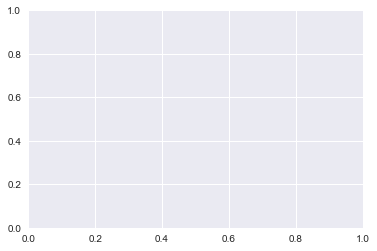

In [168]:
ax=plt.axes()
sns.heatmap(correlations["S06"],ax=ax)
plt.show()

In [136]:
inner_df.drop(["(level_0,  )","station_id,"],axis=1,inplace=True)

ValueError: labels ['(level_0,  )' 'station_id,'] not contained in axis

In [109]:
#print(nnon_zero)
key = 0
dictionary = {}
for index in indices:
    new_df = nnon_zero.loc[index]
    new_df.reset_index(inplace=True)
    print(new_df)
    #print(new_df)
    new_df.pivot(index=index,columns="station_id",values="rainfall")
    print(new_df)
    dictionary[key]=new_df
    #print(dictionary)
    key+=1
panel = pd.Panel(dictionary)

    year  month  day  hour station_id  rainfall
0   2016     12    3     1        S06       0.8
1   2016     12    3     1        S07       2.2
2   2016     12    3     1       S102       0.4
3   2016     12    3     1       S110       2.2
4   2016     12    3     1       S113       1.0
5   2016     12    3     1       S118       1.8
6   2016     12    3     1       S119       0.8
7   2016     12    3     1       S123       0.4
8   2016     12    3     1        S29       0.2
9   2016     12    3     1        S36       1.2
10  2016     12    3     1        S43       2.0
11  2016     12    3     1        S55       1.6
12  2016     12    3     1        S61       1.4
13  2016     12    3     1        S71       0.2
14  2016     12    3     1        S78       3.2
15  2016     12    3     1        S79       0.4
16  2016     12    3     1        S81       1.2
17  2016     12    3     1        S84       0.4
18  2016     12    3     1        S88       1.4
19  2016     12    3     1        S90   

KeyError: (2016, 12, 3, 1)

In [89]:
print(panel)

<class 'pandas.core.panel.Panel'>
Dimensions: 965 (items) x 56 (major_axis) x 1 (minor_axis)
Items axis: 0 to 964
Major_axis axis: S06 to S96
Minor_axis axis: rainfall to rainfall


In [42]:
for index in indices:
    particular = datetime.date(index[0:2])
    particular = datetime.time(index[3])
    print(particular)

NameError: name 'datetime' is not defined

In [19]:
stand_dev = nnon_zero.groupby("station_id").std()
stand_dev

,rainfall
station_id,
S06,6.073107
S07,7.018245
S08,6.477394
S100,5.144609
S101,5.225620
S102,5.485438
S104,5.416253
S106,4.999085
S107,5.921654


In [ ]:
stand_dev.loc["S06","rainfall"]

In [20]:
mean = nnon_zero.groupby("station_id").mean()
mean

,rainfall
station_id,
S06,3.414063
S07,3.506471
S08,3.057962
S100,2.708555
S101,3.080126
S102,2.495694
S104,3.162874
S106,2.933784
S107,3.409028


In [44]:
mean.loc["S06","rainfall"]

0.794545454545459

In [21]:
paired_hours = pd.DataFrame()
all_stations = list(nnon_zero["station_id"].unique())
print(all_stations)
paired_hours["station_id"] = all_stations
paired_hours = paired_hours.set_index("station_id")
for station in all_stations:
    paired_hours[station] = None

['S06', 'S07', 'S102', 'S110', 'S113', 'S118', 'S119', 'S123', 'S29', 'S36', 'S43', 'S55', 'S61', 'S71', 'S78', 'S79', 'S81', 'S84', 'S88', 'S90', 'S94', 'S96', 'S106', 'S117', 'S77', 'S24', 'S08', 'S108', 'S109', 'S115', 'S116', 'S120', 'S33', 'S35', 'S46', 'S50', 'S69', 'S92', 'S101', 'S122', 'S63', 'S91', 'S89', 'S11', 'S107', 'S114', 'S121', 'S44', 'S100', 'S104', 'S112', 'S40', 'S64', 'S66', 'S900', 'S60']


In [24]:
print(nnon_zero)
neww = nnon_zero.set_index("station_id",append=True)

                    station_id  rainfall
year month day hour                     
2016 12    3   1           S06       0.8
               1           S07       2.2
               1          S102       0.4
               1          S110       2.2
               1          S113       1.0
               1          S118       1.8
               1          S119       0.8
               1          S123       0.4
               1           S29       0.2
               1           S36       1.2
               1           S43       2.0
               1           S55       1.6
               1           S61       1.4
               1           S71       0.2
               1           S78       3.2
               1           S79       0.4
               1           S81       1.2
               1           S84       0.4
               1           S88       1.4
               1           S90       0.2
               1           S94       0.8
               1           S96       2.2
               2

In [25]:
neww

rainfall
year month day hour station_id          
2016 12    3   1    S06              0.8
                    S07              2.2
                    S102             0.4
                    S110             2.2
                    S113             1.0
                    S118             1.8
                    S119             0.8
                    S123             0.4
                    S29              0.2
                    S36              1.2
                    S43              2.0
                    S55              1.6
                    S61              1.4
                    S71              0.2
                    S78              3.2
                    S79              0.4
                    S81              1.2
                    S84              0.4
                    S88              1.4
                    S90              0.2
                    S94              0.8
                    S96              2.2
               2    S106             0.8
                    S117             0.2
                    S29              1.0
                    S77              0.2
                    S94              1.2
                    S96              0.2
               4    S102             0.8
                    S106             0.2
...                                  ...
2017 4     29  6    S92              1.2
               7    S116             0.2
                    S117             0.2
                    S119             0.6
                    S123             0.2
                    S33              1.0
                    S35              0.6
                    S43              0.2
                    S63              0.2
                    S71              0.2
                    S77              1.0
                    S79              1.0
                    S88              0.2
               9    S115             3.2
                    S117             0.4
                    S92              0.2
               10   S115             1.4
                    S116             3.0
                    S117             0.2
                    S63              0.2
                    S92              0.4
               12   S108             0.2
                    S92              0.2
               17   S55              0.8
                    S81              6.4
                    S900             0.2
           30  19   S100            24.0
                    S104             4.0
                    S112            34.8
                    S66             27.8

[16612 rows x 1 columns]

In [28]:
#pairs=0
for station1 in all_stations:
    # Looking for a particular hour, which other stations also have rainfall in that hour.
    # Find total number of pair of stations that have simultaneous rainfall in that hour.
    #total = 0
    #how_many = nnon_zero["station_id"].value_counts()[station1]
    #print(how_many)
    for station2 in all_stations:
        if station2 != station1:
            correlation_coeff = 0
            num_hrs = 0
            for index in indices:
                stations = nnon_zero.loc[index,"station_id"].values
                if station1 in stations:
                    if station2 in stations:
            #print(station1)
                        num_hrs += 1
                        new_index1 = index + (station1,)
                        new_index2 = index + (station2,)
                        one = neww.loc[new_index1,"rainfall"]
                        #print(one)
                        mean_one = mean.loc[station1,"rainfall"]
                        two = neww.loc[new_index2,"rainfall"]
                        #print(two)
                        mean_two = mean.loc[station2,"rainfall"]
                        correlation_coeff += (one-mean_one)*(two-mean_two)
                #print(station2,type(station2))
                #if station2 > station1:
                    #if station2 in stations:
                        #print(station2)
                
            if num_hrs != 1:
                correlation_coeff = correlation_coeff/((num_hrs-1)*stand_dev.loc[station1,"rainfall"]*stand_dev.loc[station2,"rainfall"])
            else:
                correlation_coeff = 0
            paired_hours.loc[station1,station2]= correlation_coeff
            print(station1,station2,correlation_coeff)
                #total+=1
                #if total == how_many:
                    #pairs +=1
print(paired_hours)

S06 S07 0.715473552798
S06 S102 0.111202229406
S06 S110 1.01416167059
S06 S113 0.504664114542
S06 S118 0.310875042306
S06 S119 0.313514627243
S06 S123 0.700342889483
S06 S29 0.591085724589
S06 S36 0.668238210154
S06 S43 0.723097725771
S06 S55 0.882275410125
S06 S61 0.724589604777
S06 S71 0.227473697429
S06 S78 0.537567705084
S06 S79 0.369302477325
S06 S81 0.596969787271
S06 S84 0.626644921896
S06 S88 0.683957223924
S06 S90 0.469979439765
S06 S94 0.741701899725
S06 S96 0.227987318933
S06 S106 0.37179612703
S06 S117 0.0864940735373
S06 S77 0.339087980592
S06 S24 0.427463957774
S06 S08 0.511060602007
S06 S108 0.368790561626
S06 S109 0.680672657511
S06 S115 0.101781268511
S06 S116 0.16332343776
S06 S120 0.380824670448
S06 S33 0.188103051267
S06 S35 0.0746157688696
S06 S46 0.49273055451
S06 S50 0.239805459638
S06 S69 0.459865826486
S06 S92 0.292197427726
S06 S101 0.0890101596935
S06 S122 0.692323090362
S06 S63 0.300384614413
S06 S91 0.646562012387
S06 S89 0.102163341049
S06 S11 0.1734131473

S119 S61 0.642577262461
S119 S71 0.619781184252
S119 S78 0.711100805091
S119 S79 0.921681854875
S119 S81 0.224770408856
S119 S84 0.117918067827
S119 S88 0.544303409343
S119 S90 0.623641002687
S119 S94 0.134776726551
S119 S96 0.22895697489
S119 S106 0.114661704755
S119 S117 0.222247291159
S119 S77 0.761651847881
S119 S24 0.228930989347
S119 S08 0.352413251837
S119 S108 0.93209548127
S119 S109 0.24740037003
S119 S115 0.283986749748
S119 S116 0.419768608547
S119 S120 0.796815384101
S119 S33 0.246793843651
S119 S35 0.587017320519
S119 S46 0.633155961055
S119 S50 0.519069217527
S119 S69 0.557929553459
S119 S92 0.560600223845
S119 S101 0.369365376364
S119 S122 0.112429128634
S119 S63 0.247589671798
S119 S91 0.210956052589
S119 S89 0.131668603435
S119 S11 0.246452169056
S119 S107 0.467008651565
S119 S114 0.446626761051
S119 S121 0.404143023501
S119 S44 0.153388908337
S119 S100 0.29358921918
S119 S104 0.318207197843
S119 S112 0.101959303766
S119 S40 0.350004570169
S119 S64 0.485221518502
S119 

S61 S116 0.140865755356
S61 S120 0.522778617307
S61 S33 0.0746216117329
S61 S35 0.181994208356
S61 S46 0.511731958218
S61 S50 0.317475549682
S61 S69 0.470461804854
S61 S92 0.357050137721
S61 S101 0.169153418435
S61 S122 0.374020103468
S61 S63 0.0915848234052
S61 S91 0.432898200908
S61 S89 0.115202973064
S61 S11 0.135987005308
S61 S107 0.780175618198
S61 S114 0.309700130797
S61 S121 0.348117471078
S61 S44 0.163627605247
S61 S100 0.16884820636
S61 S104 0.367336680824
S61 S112 0.186082652192
S61 S40 0.321611711635
S61 S64 0.385855238666
S61 S66 0.184717496657
S61 S900 0.332211161661
S61 S60 0.700040106852
S71 S06 0.227473697429
S71 S07 0.382267563267
S71 S102 0.606792977952
S71 S110 0.315312557542
S71 S113 0.401002350188
S71 S118 0.567675815414
S71 S119 0.619781184252
S71 S123 0.403761898357
S71 S29 0.140189020929
S71 S36 0.34719015026
S71 S43 0.287620999794
S71 S55 0.180003611858
S71 S61 0.382581433916
S71 S78 0.467957932964
S71 S79 0.612504437177
S71 S81 0.2463193986
S71 S84 0.077391228

S88 S112 0.312340730734
S88 S40 0.479913493743
S88 S64 0.656684331641
S88 S66 0.301698300772
S88 S900 0.327582289984
S88 S60 0.39591736085
S90 S06 0.469979439765
S90 S07 0.841882437641
S90 S102 0.198788977452
S90 S110 0.355675676071
S90 S113 0.605819782407
S90 S118 0.693681858321
S90 S119 0.623641002687
S90 S123 0.845327783013
S90 S29 0.14998918016
S90 S36 0.776999481052
S90 S43 0.662240290219
S90 S55 0.181847704744
S90 S61 0.567796030047
S90 S71 0.592718278214
S90 S78 0.628471041891
S90 S79 0.710661201588
S90 S81 0.20799374346
S90 S84 0.0976785846101
S90 S88 0.797976524255
S90 S94 0.216112146824
S90 S96 0.310462442311
S90 S106 0.213219860878
S90 S117 0.117843575786
S90 S77 0.740357788307
S90 S24 0.36720598798
S90 S08 0.739268131359
S90 S108 0.635734308041
S90 S109 0.41684689046
S90 S115 0.0661294503493
S90 S116 0.467093600152
S90 S120 0.96708682447
S90 S33 0.258667027377
S90 S35 0.389854420266
S90 S46 0.776343201585
S90 S50 0.540685283355
S90 S69 0.622146775353
S90 S92 0.63320094952
S

S24 S43 0.368077521498
S24 S55 0.317507760592
S24 S61 0.499479574423
S24 S71 0.169886266549
S24 S78 0.419031725417
S24 S79 0.217150385608
S24 S81 0.509652859184
S24 S84 0.601932709577
S24 S88 0.286756210355
S24 S90 0.36720598798
S24 S94 0.693936220339
S24 S96 0.684404527056
S24 S106 0.588238238088
S24 S117 0.0296398749364
S24 S77 0.250754747757
S24 S08 0.229346579258
S24 S108 0.287695849763
S24 S109 0.193965966254
S24 S115 0.0539674790504
S24 S116 0.112513849145
S24 S120 0.307492533628
S24 S33 0.123421938959
S24 S35 0.167504384926
S24 S46 0.263387686584
S24 S50 0.233798557056
S24 S69 0.220995077688
S24 S92 0.151194594031
S24 S101 0.307872314225
S24 S122 0.211328149243
S24 S63 0.0887397230297
S24 S91 0.257337093086
S24 S89 0.00129624712575
S24 S11 0.210535152047
S24 S107 0.565768656103
S24 S114 0.200217712762
S24 S121 0.285875640303
S24 S44 0.206515033651
S24 S100 0.112286853361
S24 S104 0.141160124093
S24 S112 0.289107539546
S24 S40 0.165892719355
S24 S64 0.176680077638
S24 S66 0.19819

S120 S94 0.152108280796
S120 S96 0.360932976588
S120 S106 0.206872592818
S120 S117 0.18040570214
S120 S77 0.883441559676
S120 S24 0.307492533628
S120 S08 0.636071755907
S120 S108 0.691520424199
S120 S109 0.435076117356
S120 S115 0.0409994780329
S120 S116 0.471686764225
S120 S33 0.285072227066
S120 S35 0.630282189585
S120 S46 0.719872192719
S120 S50 0.617257968838
S120 S69 0.650081957389
S120 S92 0.670038981236
S120 S101 0.272368536744
S120 S122 0.18441972473
S120 S63 0.28519121534
S120 S91 0.227430179937
S120 S89 0.0973972585573
S120 S11 0.169300523782
S120 S107 0.479114044819
S120 S114 0.437091393053
S120 S121 0.35027153215
S120 S44 0.237015734291
S120 S100 0.355604702797
S120 S104 0.188700841492
S120 S112 0.131888299034
S120 S40 0.387633456663
S120 S64 0.487310372971
S120 S66 0.201317580741
S120 S900 0.238040541944
S120 S60 0.244065454343
S33 S06 0.188103051267
S33 S07 0.182898588004
S33 S102 0.488732914807
S33 S110 0.263883968952
S33 S113 0.150236526088
S33 S118 0.326612487533
S33 S

S92 S63 0.281395560338
S92 S91 0.213242813644
S92 S89 0.429934413201
S92 S11 0.310330796435
S92 S107 0.439902350172
S92 S114 0.22276459134
S92 S121 0.297028625738
S92 S44 0.308373307264
S92 S100 0.147066943478
S92 S104 0.232503126199
S92 S112 0.126331502798
S92 S40 0.180982138855
S92 S64 0.174659915202
S92 S66 0.127593770326
S92 S900 0.0308078013028
S92 S60 0.360225725738
S101 S06 0.0890101596935
S101 S07 0.105386741947
S101 S102 0.291640880936
S101 S110 0.176089817956
S101 S113 0.138062021425
S101 S118 0.271156846108
S101 S119 0.369365376364
S101 S123 0.196794363577
S101 S29 0.243437798829
S101 S36 0.156400760379
S101 S43 0.0830873091377
S101 S55 0.155938675143
S101 S61 0.169153418435
S101 S71 0.448064049651
S101 S78 0.244928080462
S101 S79 0.321788008103
S101 S81 0.217156169972
S101 S84 0.0469560401665
S101 S88 0.122834793858
S101 S90 0.161848256365
S101 S94 0.148709217961
S101 S96 0.293792306203
S101 S106 0.235079756705
S101 S117 0.24193312052
S101 S77 0.418178956701
S101 S24 0.3078

S11 S60 0.22900581957
S107 S06 0.514561202029
S107 S07 0.433719288292
S107 S102 0.114867374147
S107 S110 0.387170728756
S107 S113 0.74256351146
S107 S118 0.420961984576
S107 S119 0.467008651565
S107 S123 0.502933268663
S107 S29 0.563742950215
S107 S36 0.46621559259
S107 S43 0.461574841234
S107 S55 0.502661577208
S107 S61 0.780175618198
S107 S71 0.426950553972
S107 S78 0.641781788769
S107 S79 0.467835460728
S107 S81 0.548285777844
S107 S84 0.641373316163
S107 S88 0.387550019697
S107 S90 0.486117461703
S107 S94 0.602677081535
S107 S96 0.571753169585
S107 S106 0.29073840758
S107 S117 -0.0245792641994
S107 S77 0.461542402014
S107 S24 0.565768656103
S107 S08 0.359838783681
S107 S108 0.495128852624
S107 S109 0.374775378763
S107 S115 0.104431671011
S107 S116 0.307760857627
S107 S120 0.479114044819
S107 S33 0.0317750739602
S107 S35 0.213947896016
S107 S46 0.397529916962
S107 S50 0.287618588318
S107 S69 0.348593407314
S107 S92 0.439902350172
S107 S101 0.191417577888
S107 S122 0.354970138391
S10

S112 S29 0.411317706319
S112 S36 0.313320994653
S112 S43 0.220687310489
S112 S55 0.179345464596
S112 S61 0.186082652192
S112 S71 0.109697150041
S112 S78 0.128348243786
S112 S79 0.103416234857
S112 S81 0.181948806342
S112 S84 0.263365039498
S112 S88 0.312340730734
S112 S90 0.161714943491
S112 S94 0.291261487093
S112 S96 0.0725553083052
S112 S106 0.154664060495
S112 S117 0.0372525026421
S112 S77 0.114426144711
S112 S24 0.289107539546
S112 S08 0.354567543383
S112 S108 0.117933948224
S112 S109 0.33357299954
S112 S115 -0.0237851677539
S112 S116 0.0876401222877
S112 S120 0.131888299034
S112 S33 0.216083371923
S112 S35 0.224721016637
S112 S46 0.154737449364
S112 S50 0.194145651202
S112 S69 0.484969231327
S112 S92 0.126331502798
S112 S101 0.195559980298
S112 S122 0.517426207562
S112 S63 0.222836197252
S112 S91 0.592814926972
S112 S89 -0.00269407720441
S112 S11 0.204639147377
S112 S107 0.146358117028
S112 S114 0.392414715276
S112 S121 0.314117590531
S112 S44 0.200256562377
S112 S100 0.916033396

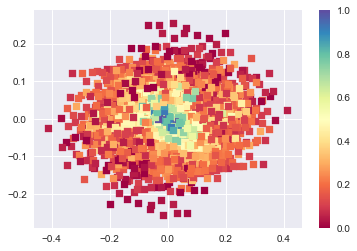

In [30]:
for station1 in all_stations:
    new_locations = locations.set_index("station_id",drop=True)
    new_locations["longitude"] = new_locations["longitude"]-new_locations.loc[station1,"longitude"]
    new_locations["latitude"] = new_locations["latitude"]-new_locations.loc[station1,"latitude"]
    for station2 in all_stations:
        if station2 != station1:
            x=new_locations.loc[station2,"longitude"]
            y=new_locations.loc[station2,"latitude"]
            z=paired_hours.loc[station1,station2]
            plt.scatter(x,y,c=z,vmin=0, vmax=1, marker="s",cmap="Spectral")
plt.colorbar()
plt.show()

In [79]:
#paired_hours = pd.DataFrame()
#stations = nnon_zero["station_id"].values
#all_stations = list(nnon_zero["station_id"])
#paired_hours["station_id"] = stations
#paired_hours = paired_hours.set_index("station_id")
#for station in stations:
#    paired_hours[station] = None
#paired_hours.loc["S29"] = 3
#paired_hours

#stations = nnon_zero.loc[(2016,12,3,1),"station_id"]
#exclude = set(stations)-{"S06"}
#exclude
neww = nnon_zero.set_index("station_id",append=True)
for index in indices:
    new_index = index+("S06",)
    if new_index in neww.index:
        print((neww.loc[new_index,"rainfall"]-mean.loc["S06","rainfall"])*(neww.loc[new_index,"rainfall"]-mean.loc["S07","rainfall"]))

7.07488327206
0.209710477941
0.545070772059
6.05077665441
0.209710477941
4.24256341912
10.627203125
10.627203125
2.75435018382
307.64011489
10.627203125
48.157765625
10.627203125
10.627203125
5.10667003676
0.00149724264706
10.627203125
8.17898988971
7.07488327206
22.4629384191
10.627203125
10.627203125
9.36309650735
10.627203125
10.627203125
0.113284007353
9.36309650735
0.209710477941
10.627203125
0.209710477941
20.6070450368
6.05077665441
8.17898988971
5.10667003676
10.627203125
9.36309650735
2.13024356618
162.298673713
4.57632444853
9.36309650735
2.75435018382
10.627203125
22.4629384191
2.75435018382
6.05077665441
9.36309650735
30.6865119485
1335.14998621
5.10667003676
3.45845680147
4.24256341912
10.627203125
4.57632444853
0.209710477941
8.17898988971
10.627203125
9.36309650735
10.627203125
4.24256341912
9.36309650735
8.17898988971
9.36309650735
9.36309650735
9.36309650735
7.07488327206
8.17898988971
6.05077665441
0.0656038602941
9.36309650735
7.07488327206
102.812059743
10.627203125

In [ ]:
new_locations = locations.set_index("station_id",drop=True)
for station1 in all_stations:
    new_locations["longitude"] = new_locations["longitude"]-new_locations.loc[station1,"longitude"]
    new_locations["latitude"] = new_locations["latitude"]-new_locations.loc[station1,"latitude"]
    for station2 in all_stations:
        if station2 != station1:
            x=new_locations.loc[station2,"longitude"]
            y=new_locations.loc[station2,"latitude"]
            z=correlations.loc[station1,station2]
            plt.pcolor(x,y,z,vmin=0,vmax=1)
plt.colorbar()
plt.show()

In [243]:
class Station():
    def __init__(self, station, indices):
        self.id = station
        self.data = {}
        for index in indices:
            # raining is all the stations that rain in that index
            raining = set(nnon_zero.loc[index,"station_id"])
            if station in raining: # there is rainfall in that index
                self.data[index] = list(raining - {station})
        self.dataframe = pd.DataFrame(self.data)
    def __repr__(self):
        return str(self.dataframe)

a = Station('S06',[(2016, 12, 3, 1)])
print(a)

TypeError: __str__ returned non-string (type tuple)

In [238]:
a.data


{}

In [219]:
list(nnon_zero.loc[(2016, 12, 3, 1),"station_id"])

['S06',
 'S07',
 'S102',
 'S110',
 'S113',
 'S118',
 'S119',
 'S123',
 'S29',
 'S36',
 'S43',
 'S55',
 'S61',
 'S71',
 'S78',
 'S79',
 'S81',
 'S84',
 'S88',
 'S90',
 'S94',
 'S96']

In [218]:
nnon_zero["station_id"].value_counts()['S90']

301

In [50]:
paired_hours = paired_hours.dropna(how="all")
paired_hours

,S90,S07,S71,S88
indices,,,,
"(2016, 12, 3, 1)",NaN,S88,S88,S90
"(2016, 12, 3, 5)",NaN,S88,S88,S90
"(2016, 12, 3, 6)",NaN,S88,S88,NaN
"(2016, 12, 4, 21)",NaN,S88,NaN,S90
"(2016, 12, 4, 22)",NaN,S88,NaN,NaN
"(2016, 12, 5, 21)",NaN,NaN,S90,NaN
"(2016, 12, 5, 22)",NaN,S88,S88,S90
"(2016, 12, 5, 23)",NaN,S88,S88,S90
"(2016, 12, 6, 0)",NaN,S88,NaN,S90


In [207]:
nnon_zero.head()["station_id"]

KeyError: 'station_id'

In [51]:
pairs

0

In [208]:
nnon_zero.head()


rainfall                                               \
station_id               S06  S07  S08 S100 S101 S102 S104 S106 S107 S108   
year month day hour                                                         
2016 12    3   1         0.8  2.2  NaN  NaN  NaN  0.4  NaN  NaN  NaN  NaN   
               2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.8  NaN  NaN   
               4         NaN  NaN  NaN  NaN  NaN  0.8  NaN  0.2  NaN  NaN   
               5         3.0  4.4  1.4  NaN  NaN  3.4  NaN  0.2  NaN  4.6   
               6         4.2  0.8  1.0  NaN  0.2  0.2  NaN  0.4  NaN  NaN   

                    ...                                                    
station_id          ...   S81  S84  S88 S89  S90 S900  S91  S92  S94  S96  
year month day hour ...                                                    
2016 12    3   1    ...   1.2  0.4  1.4 NaN  0.2  NaN  NaN  NaN  0.8  2.2  
               2    ...   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  1.2  0.2  
               4    ...   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  3.8  
               5    ...   1.0  0.2  2.8 NaN  8.0  NaN  NaN  8.2  1.0  1.8  
               6    ...   1.4  1.6  1.6 NaN  NaN  NaN  0.2  NaN  0.6  9.4  

[5 rows x 56 columns]

In [209]:
type(nnon_zero.head())

pandas.core.frame.DataFrame